# First Introduction to Jupyter

Raphael and Judit and I are exploring python. 

The first thing we're going to do is try to make a function for the "bulge" for rotation curves.

In [1]:
import numpy as np

#r0 = 3.07e3 #in pc 
r0 = 1533 #Judit found this online
Sigb = 5.12e6 #solar masses per pc^2
n = 4

In [2]:
print(r0)

1533


In [3]:
print('hello world, r0 is: {} pc {}'.format(r0,3))

hello world, r0 is: 1533 pc 3


In [4]:
import matplotlib as mpl



In [5]:
#let's try to create the funcntion for the "bulge" this is called a "lambda" function in python

sig_b = lambda x: Sigb*np.exp(-np.power(x/r0,(1/4)))

#now try the hump:
Sigg01 = 11.0e6
rg1 = 5.0e3
Wg1 = 4.0e3
sig_g = lambda x: Sigg01*np.exp(-((x-rg1)/Wg1)**2)

#vectorize this so it can hold a bunch of values
vec_sig_b = np.vectorize(sig_b)
vec_sig_g = np.vectorize(sig_g)

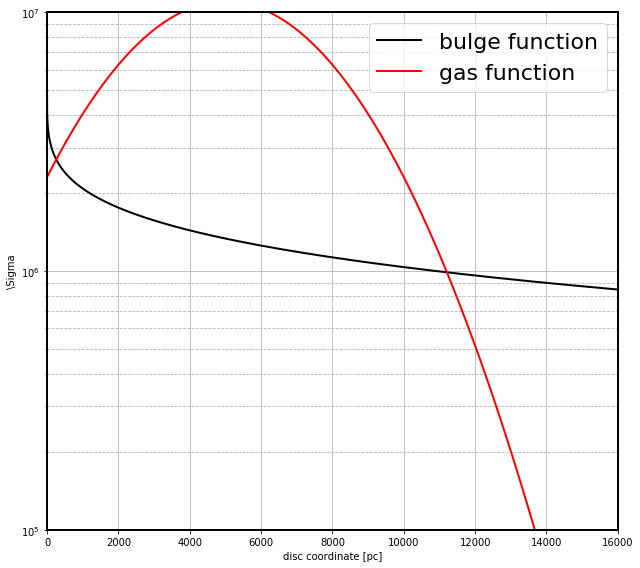

In [7]:
#set up a plot 
import matplotlib as mpl
from matplotlib import pyplot as plt

#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes



X = np.arange(0.0,16000,0.1)
ax1.plot(X,vec_sig_b(X), color='k', linestyle='-', \
         label='bulge function', linewidth=2)
ax1.plot(X,vec_sig_g(X), color='r', linestyle='-', \
         label='gas function', linewidth=2)





ax1.set_yscale('log')
ax1.set_xlim(0, 16000) #in pairs
ax1.set_ylim(1e5,1e7)
ax1.set_xlabel('disc coordinate [pc]')
ax1.set_ylabel('\Sigma')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('first_plot.png')
plt.show()